In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from embedding_evaluation import EmbeddingEvaluation

# Evaluation of the Embedding
## Intro
#### Methods
- Jaccard Distance vs Euclidean Distance
- head + tail embedding vs tail embedding
#### Evaluation:
- 3 Neighbours vs 5 Neighbours
- Ordered vs Unordered
## Step 1 - Generation of the Subgraphs

In [11]:
# not prop
emb_eval_j = EmbeddingEvaluation("jaccard", False)
emb_eval_j.generate_rating_param_sub_kg()
emb_eval_e = EmbeddingEvaluation("euclidean", False)
emb_eval_e.generate_rating_param_sub_kg()

# prop
emb_eval_j_prop = EmbeddingEvaluation("euclidean", False)
emb_eval_j_prop.generate_rating_param_sub_kg_prop()
emb_eval_e_prop = EmbeddingEvaluation("euclidean", False)
emb_eval_e_prop.generate_rating_param_sub_kg_prop()

#### Step 2 - Calculation of the Equalities between parameter matches and embeddings

re -> rating equality, ed -> embedding
jac -> jaccard, euc -> euclidean

In [12]:
# not prop
re_jac_3, re_jac_3_val, ed_jac_3, ed_jac_3_val = emb_eval_j.calculate_sub_kg_equality('euclidean', 3)
re_jac_5, re_jac_5_val, ed_jac_5, ed_jac_5_val = emb_eval_j.calculate_sub_kg_equality('euclidean', 5)
re_euc_3, re_euc_3_val, ed_euc_3, ed_euc_3_val = emb_eval_e.calculate_sub_kg_equality('euclidean', 3)
re_euc_5, re_euc_5_val, ed_euc_5, ed_euc_5_val = emb_eval_e.calculate_sub_kg_equality('euclidean', 5)

re_jac_3_prop, re_jac_3_val_prop, ed_jac_3_prop, ed_jac_3_val_prop = emb_eval_j_prop.calculate_sub_kg_equality('euclidean', 3)
re_jac_5_prop, re_jac_5_val_prop, ed_jac_5_prop, ed_jac_5_val_prop = emb_eval_j_prop.calculate_sub_kg_equality('euclidean', 5)
re_euc_3_prop, re_euc_3_val_prop, ed_euc_3_prop, ed_euc_3_val_prop = emb_eval_e_prop.calculate_sub_kg_equality('euclidean', 3)
re_euc_5_prop, re_euc_5_val_prop, ed_euc_5_prop, ed_euc_5_val_prop = emb_eval_e_prop.calculate_sub_kg_equality('euclidean', 5)

100%|██████████| 51/51 [01:32<00:00,  1.81s/it]


In [13]:
re_euc_3_table = re_euc_3.copy()
re_euc_3_val_table = re_euc_3_val.copy()
re_euc_3_table['type'] = ['rating' for _ in range(len(re_euc_3_val))]
re_euc_3_table.set_axis(['1', '2', '3', 'type'], axis=1, inplace=True)
re_euc_3_val_table['type'] = ['distance' for _ in range(len(re_euc_3_val_table))]
re_euc_3_val_table.set_axis(['1', '2', '3', 'type'], axis=1, inplace=True)

x = pd.concat([re_euc_3_table, re_euc_3_val_table], axis=1, keys=['rating', 'distance'])
x.drop("type", axis=1, level=1)
x.swaplevel(0,1,axis=1)[['1','2','3']]

1                            2           \
                                rating distance              rating distance   
stringing                poor_bridging       28               blobs       26   
line_misalignment       over_extrusion       29    layer_separation       28   
gaps                  layer_separation       27     under_extrusion       27   
layer_separation        over_extrusion       31  layer_misalignment       31   
over_extrusion        layer_separation       31   line_misalignment       29   
poor_bridging                stringing       28               blobs       24   
layer_misalignment             burning       34    layer_separation       31   
burning             layer_misalignment       34    layer_separation       31   
blobs                        stringing       26       poor_bridging       24   
under_extrusion     layer_misalignment       31             burning       31   
warping                      stringing       23   line_misalignment       23   
not_labelable            lost_adhesion       32               blobs       22   
lost_adhesion            not_labelable       32               blobs       22   

                                     3           
                                rating distance  
stringing                      warping       23  
line_misalignment      under_extrusion       26  
gaps                    over_extrusion       26  
layer_separation               burning       31  
over_extrusion      layer_misalignment       28  
poor_bridging                  warping       21  
layer_misalignment     under_extrusion       31  
burning                under_extrusion       31  
blobs                          warping       23  
under_extrusion       layer_separation       30  
warping                          blobs       23  
not_labelable                  warping       19  
lost_adhesion                  warping       21

In [14]:
ed_euc_3_table = ed_euc_3.copy()
ed_euc_3_val_table = ed_euc_3_val.copy()
ed_euc_3_table['type'] = ['rating' for _ in range(len(ed_euc_3_val))]
ed_euc_3_table.set_axis(['1', '2', '3', 'type'], axis=1, inplace=True)
ed_euc_3_val_table['type'] = ['distance' for _ in range(len(ed_euc_3_val_table))]
ed_euc_3_val_table.set_axis(['1', '2', '3', 'type'], axis=1, inplace=True)

x = pd.concat([ed_euc_3_table, ed_euc_3_val_table], axis=1, keys=['rating', 'distance'])
x.drop("type", axis=1, level=1)
x.swaplevel(0,1,axis=1)[['1','2','3']]

1                            2           \
                                rating distance              rating distance   
stringing                        blobs     3.00       poor_bridging     3.24   
line_misalignment       over_extrusion     2.98    layer_separation     3.78   
gaps                  layer_separation     3.23     under_extrusion     3.24   
layer_separation        over_extrusion     2.42  layer_misalignment     2.47   
over_extrusion        layer_separation     2.42   line_misalignment     2.98   
poor_bridging                stringing     3.24               blobs     4.08   
layer_misalignment             burning     0.01     under_extrusion     2.18   
burning             layer_misalignment     0.01     under_extrusion     2.19   
blobs                        stringing     3.00       poor_bridging     4.08   
under_extrusion     layer_misalignment     2.18             burning     2.19   
warping                          blobs     4.49   line_misalignment     4.58   
not_labelable            lost_adhesion     1.80               blobs     4.79   
lost_adhesion            not_labelable     1.80               blobs     4.86   

                                   3           
                              rating distance  
stringing                    warping     5.13  
line_misalignment               gaps     3.91  
gaps                  over_extrusion     3.55  
layer_separation             burning     2.48  
over_extrusion                  gaps     3.55  
poor_bridging                warping     5.25  
layer_misalignment  layer_separation     2.47  
burning             layer_separation     2.48  
blobs                        warping     4.49  
under_extrusion     layer_separation     2.57  
warping                    stringing     5.13  
not_labelable                warping     5.36  
lost_adhesion                warping     5.15

#### Step 3 - Get number of matches

In [15]:
# Not Propated
# ORDERED
# jaccard distance
num_match_ord_euc_3 = emb_eval_e.get_ord_diff_kg_and_emb(re_euc_3, ed_euc_3)
num_match_ord_euc_5 = emb_eval_e.get_ord_diff_kg_and_emb(re_euc_5, ed_euc_5)
# euclidean distance
num_match_ord_jac_3 = emb_eval_j.get_ord_diff_kg_and_emb(re_jac_3, ed_jac_3)
num_match_ord_jac_5 = emb_eval_j.get_ord_diff_kg_and_emb(re_jac_5, ed_jac_5)

# UNORDERED
# jaccard distance
num_match_urd_euc_3 = emb_eval_e.get_unord_diff_kg_and_emb(re_euc_3, ed_euc_3)
num_match_urd_euc_5 = emb_eval_e.get_unord_diff_kg_and_emb(re_euc_5, ed_euc_5)
# euclidean distance
num_match_urd_jac_3 = emb_eval_j.get_unord_diff_kg_and_emb(re_jac_3, ed_jac_3)
num_match_urd_jac_5 = emb_eval_j.get_unord_diff_kg_and_emb(re_jac_5, ed_jac_5)

# Propagated
# ORDERED
# jaccard distance
num_match_ord_euc_3_prop = emb_eval_e.get_ord_diff_kg_and_emb(re_euc_3_prop, ed_euc_3_prop)
num_match_ord_euc_5_prop = emb_eval_e.get_ord_diff_kg_and_emb(re_euc_5_prop, ed_euc_5_prop)
# euclidean distance
num_match_ord_jac_3_prop = emb_eval_j.get_ord_diff_kg_and_emb(re_jac_3_prop, ed_jac_3_prop)
num_match_ord_jac_5_prop = emb_eval_j.get_ord_diff_kg_and_emb(re_jac_5_prop, ed_jac_5_prop)

# UNORDERED
# jaccard distance
num_match_urd_euc_3_prop = emb_eval_e.get_unord_diff_kg_and_emb(re_euc_3_prop, ed_euc_3_prop)
num_match_urd_euc_5_prop = emb_eval_e.get_unord_diff_kg_and_emb(re_euc_5_prop, ed_euc_5_prop)
# euclidean distance
num_match_urd_jac_3_prop = emb_eval_j.get_unord_diff_kg_and_emb(re_jac_3_prop, ed_jac_3_prop)
num_match_urd_jac_5_prop = emb_eval_j.get_unord_diff_kg_and_emb(re_jac_5_prop, ed_jac_5_prop)

In [16]:
# Not Propagated
# ORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_ord_3_nhead = pd.concat([num_match_ord_euc_3, num_match_ord_jac_3], axis=1)
num_match_ord_3_nhead.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_ord_5_nhead = pd.concat([num_match_ord_euc_5, num_match_ord_jac_5], axis=1)
num_match_ord_5_nhead.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

# UNORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_urd_3_nhead = pd.concat([num_match_urd_euc_3, num_match_urd_jac_3], axis=1)
num_match_urd_3_nhead.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_urd_5_nhead = pd.concat([num_match_urd_euc_5, num_match_urd_jac_5], axis=1)
num_match_urd_5_nhead.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

# Propagated
# ORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_ord_3_prop = pd.concat([num_match_ord_euc_3_prop, num_match_ord_jac_3_prop], axis=1)
num_match_ord_3_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_ord_5_prop = pd.concat([num_match_ord_euc_5_prop, num_match_ord_jac_5_prop], axis=1)
num_match_ord_5_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

# UNORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_urd_3_prop = pd.concat([num_match_urd_euc_3_prop, num_match_urd_jac_3_prop], axis=1)
num_match_urd_3_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_urd_5_prop = pd.concat([num_match_urd_euc_5_prop, num_match_urd_jac_5_prop], axis=1)
num_match_urd_5_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

In [17]:
%store -r num_match_ord_3_head
%store -r num_match_urd_3_head
%store -r num_match_ord_5_head
%store -r num_match_urd_5_head

In [18]:
num_match_ord_3 = pd.concat([num_match_ord_3_nhead, num_match_ord_3_head], axis=1)
num_match_ord_3.set_axis(['Euc-NoHead', 'Jac-NoHead', 'Euc-Head', 'Jac-Head'], axis=1, inplace=True)
num_match_urd_3 = pd.concat([num_match_urd_3_nhead, num_match_urd_3_head], axis=1)
num_match_urd_3.set_axis(['Euc-NoHead', 'Jac-NoHead', 'Euc-Head', 'Jac-Head'], axis=1, inplace=True)
num_match_ord_5 = pd.concat([num_match_ord_5_nhead, num_match_ord_5_head], axis=1)
num_match_ord_5.set_axis(['Euc-NoHead', 'Jac-NoHead', 'Euc-Head', 'Jac-Head'], axis=1, inplace=True)
num_match_urd_5 = pd.concat([num_match_urd_5_nhead, num_match_urd_5_head], axis=1)
num_match_urd_5.set_axis(['Euc-NoHead', 'Jac-NoHead', 'Euc-Head', 'Jac-Head'], axis=1, inplace=True)

<AxesSubplot:title={'center':'#Matches Unordered - 5 Neighbours'}>

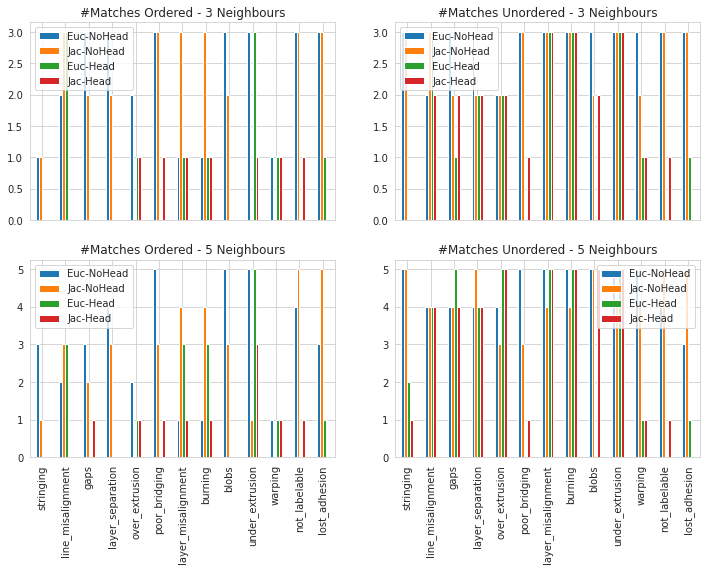

In [19]:
# Not Propagated
# ORDERED
fig, axes = plt.subplots(2,2, sharex=True, figsize=(12,8))
num_match_ord_3.plot(kind="bar", title="#Matches Ordered - 3 Neighbours", ax=axes[0][0])
num_match_urd_3.plot(kind="bar", title="#Matches Unordered - 3 Neighbours", ax=axes[0][1])
num_match_ord_5.plot(kind="bar", title="#Matches Ordered - 5 Neighbours", ax=axes[1][0])
num_match_urd_5.plot(kind="bar", title="#Matches Unordered - 5 Neighbours", ax=axes[1][1])

In [20]:
# Not Propagated
# ORDERED
ordered_match_table = pd.concat([num_match_ord_3_nhead.mean(), num_match_ord_3_nhead.mean() * 100 / 3, num_match_ord_3_nhead.median(), num_match_ord_5_nhead.mean(), num_match_ord_5_nhead.mean() * 100 / 5, num_match_ord_5_nhead.median()], axis=1)
ordered_match_table.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

# UNORDERED
unordered_match_table = pd.concat([num_match_urd_3_nhead.mean(), num_match_urd_3_nhead.mean() * 100 / 3, num_match_urd_3_nhead.median(), num_match_urd_5_nhead.mean(), num_match_urd_5_nhead.mean() * 100 / 5, num_match_urd_5_nhead.median()], axis=1)
unordered_match_table.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

# Propagated
# ORDERED
ordered_match_table_prop = pd.concat([num_match_ord_3_prop.mean(), num_match_ord_3_prop.mean() * 100 / 3, num_match_ord_3_prop.median(), num_match_ord_5_prop.mean(), num_match_ord_5_prop.mean() * 100 / 5, num_match_ord_5_prop.median()], axis=1)
ordered_match_table_prop.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

# UNORDERED
unordered_match_table_prop = pd.concat([num_match_urd_3_prop.mean(), num_match_urd_3_prop.mean() * 100 / 3, num_match_urd_3_prop.median(), num_match_urd_5_prop.mean(), num_match_urd_5_prop.mean() * 100 / 5, num_match_urd_5_prop.median()], axis=1)
unordered_match_table_prop.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

concat_table_prop = pd.concat([ordered_match_table_prop, unordered_match_table_prop], axis=0, keys=["Orderd", "Unordered"])

In [21]:
concat_table_prop

Mean 3 Neighb.   % from 3  Median 3 Neighb.  \
Orderd    euclidean        0.901961  30.065359               1.0   
          jaccard          0.901961  30.065359               1.0   
Unordered euclidean        1.392157  46.405229               2.0   
          jaccard          1.392157  46.405229               2.0   

                     Mean 5 Neighb.   % from 5  Median 5 Neighb.  
Orderd    euclidean        1.176471  23.529412               1.0  
          jaccard          1.176471  23.529412               1.0  
Unordered euclidean        2.549020  50.980392               3.0  
          jaccard          2.549020  50.980392               3.0

In [22]:
pd.concat([ordered_match_table, unordered_match_table], axis=1, keys=["Orderd", "Unordered"])

Orderd                                             \
          Mean 3 Neighb.   % from 3 Median 3 Neighb. Mean 5 Neighb.   
euclidean       2.230769  74.358974              3.0       3.000000   
jaccard         1.923077  64.102564              2.0       2.615385   

                                           Unordered             \
            % from 5 Median 5 Neighb. Mean 3 Neighb.   % from 3   
euclidean  60.000000              3.0       2.846154  94.871795   
jaccard    52.307692              3.0       2.615385  87.179487   

                                                                       
          Median 3 Neighb. Mean 5 Neighb.   % from 5 Median 5 Neighb.  
euclidean              3.0       4.461538  89.230769              5.0  
jaccard                3.0       4.230769  84.615385              4.0

In [23]:
pd.concat([ordered_match_table_prop, unordered_match_table_prop], axis=1, keys=["Orderd", "Unordered"])

Orderd                                             \
          Mean 3 Neighb.   % from 3 Median 3 Neighb. Mean 5 Neighb.   
euclidean       0.901961  30.065359              1.0       1.176471   
jaccard         0.901961  30.065359              1.0       1.176471   

                                           Unordered             \
            % from 5 Median 5 Neighb. Mean 3 Neighb.   % from 3   
euclidean  23.529412              1.0       1.392157  46.405229   
jaccard    23.529412              1.0       1.392157  46.405229   

                                                                       
          Median 3 Neighb. Mean 5 Neighb.   % from 5 Median 5 Neighb.  
euclidean              2.0        2.54902  50.980392              3.0  
jaccard                2.0        2.54902  50.980392              3.0

In [24]:
print(pd.concat([ordered_match_table, unordered_match_table], axis=1, keys=["Orderd", "Unordered"]).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{6}{l}{Orderd} & \multicolumn{6}{l}{Unordered} \\
{} & Mean 3 Neighb. &   \% from 3 & Median 3 Neighb. & Mean 5 Neighb. &   \% from 5 & Median 5 Neighb. & Mean 3 Neighb. &   \% from 3 & Median 3 Neighb. & Mean 5 Neighb. &   \% from 5 & Median 5 Neighb. \\
\midrule
euclidean &       2.230769 &  74.358974 &              3.0 &       3.000000 &  60.000000 &              3.0 &       2.846154 &  94.871795 &              3.0 &       4.461538 &  89.230769 &              5.0 \\
jaccard   &       1.923077 &  64.102564 &              2.0 &       2.615385 &  52.307692 &              3.0 &       2.615385 &  87.179487 &              3.0 &       4.230769 &  84.615385 &              4.0 \\
\bottomrule
\end{tabular}



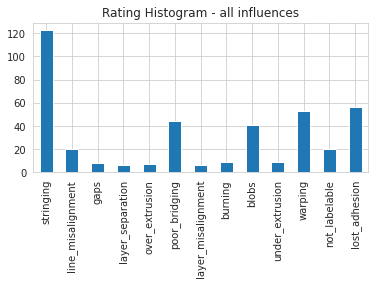

In [26]:
import pandas as pd

df = pd.read_csv("dataset/database/vertex_dataframe.csv")  # csv from igraph.get_vertex_dataframe()
rating_values = df.loc[df['type'] != 'parameter'][['key', 'value']]
rating_histo = emb_eval_e.get_number_of_occurence(list(num_match_ord_euc_3.index), rating_values)
plot_title = "Rating Histogram - all influences"
# fig = plt.figure(figsize=(12,8))
rating_histo.plot(kind="bar", title=plot_title, legend=None)
fig.tight_layout()
plt.gcf().subplots_adjust(bottom=0.36)
# plt.savefig('Rating_Histogram_all_influences.pdf')

#### KDE Plots

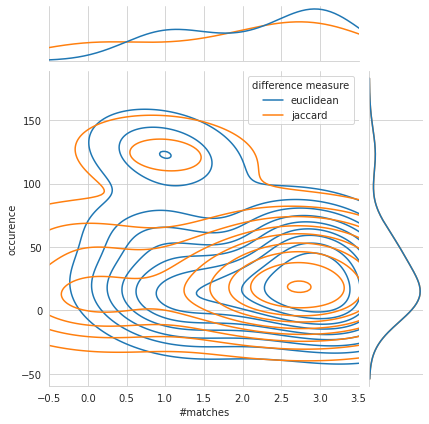

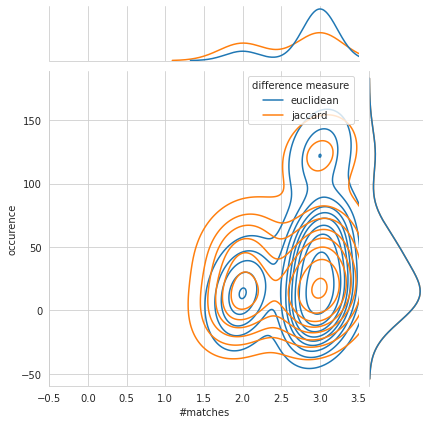

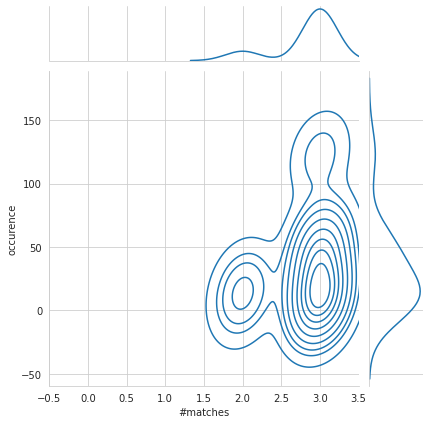

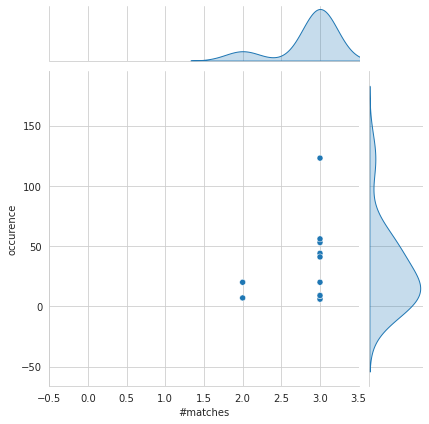

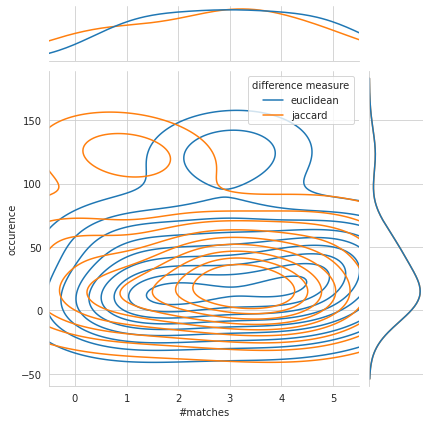

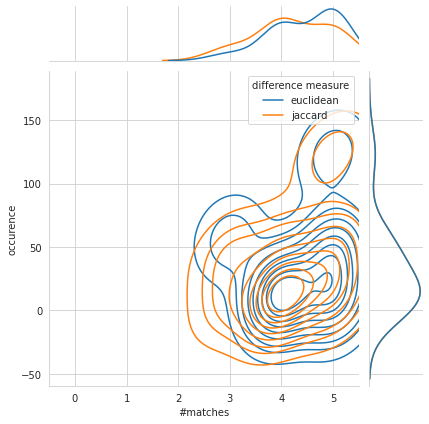

In [27]:
# ORDERED 3 Neighbours
num_match_ord_3_kde = pd.concat([num_match_ord_3_nhead, rating_histo], axis=1)
num_match_ord_3_kde_euc = num_match_ord_3_kde[['euclidean', 'occurence']]
num_match_ord_3_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_3_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_ord_3_kde_euc))]
num_match_ord_3_kde_jac = num_match_ord_3_kde[['jaccard', 'occurence']]
num_match_ord_3_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_3_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_ord_3_kde_jac))]
num_match_ord_3_kde_ej = pd.concat([num_match_ord_3_kde_euc, num_match_ord_3_kde_jac], axis=0, ignore_index=True)
sns.jointplot(data=num_match_ord_3_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5),  kind="kde")
# plt.savefig("KDEplot_num_match_ord_3.pdf")

# UNORDERED 3 Neighbours
num_match_urd_3_kde = pd.concat([num_match_urd_3_nhead, rating_histo], axis=1)
num_match_urd_3_kde_euc = num_match_urd_3_kde[['euclidean', 'occurence']]
num_match_urd_3_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_3_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_urd_3_kde_euc))]
num_match_urd_3_kde_jac = num_match_urd_3_kde[['jaccard', 'occurence']]
num_match_urd_3_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_3_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_urd_3_kde_jac))]
num_match_urd_3_kde_ej = pd.concat([num_match_urd_3_kde_euc, num_match_urd_3_kde_jac], axis=0, ignore_index=True)
sns.jointplot(data=num_match_urd_3_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5), kind="kde")
sns.jointplot(data=num_match_urd_3_kde_euc, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5), kind="kde", legend=False)
# plt.savefig("KDEplot_num_match_urd_3_euc_nl.pdf")
sns.jointplot(data=num_match_urd_3_kde_euc, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5), legend=False)
# plt.savefig("KDEplot_num_match_urd_3_euc_points_nl.pdf")


# ORDERED 5 Neighbours
num_match_ord_5_kde = pd.concat([num_match_ord_5_nhead, rating_histo], axis=1)
num_match_ord_5_kde_euc = num_match_ord_5_kde[['euclidean', 'occurence']]
num_match_ord_5_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_5_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_ord_5_kde_euc))]
num_match_ord_5_kde_jac = num_match_ord_5_kde[['jaccard', 'occurence']]
num_match_ord_5_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_5_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_ord_5_kde_jac))]
num_match_ord_5_kde_ej = pd.concat([num_match_ord_5_kde_euc, num_match_ord_5_kde_jac], axis=0, ignore_index=True)
sns.jointplot(data=num_match_ord_5_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 5.5), kind="kde")


# UNORDERED 5 Neighbours
num_match_urd_5_kde = pd.concat([num_match_urd_5_nhead, rating_histo], axis=1)
num_match_urd_5_kde_euc = num_match_urd_5_kde[['euclidean', 'occurence']]
num_match_urd_5_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_5_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_urd_5_kde_euc))]
num_match_urd_5_kde_jac = num_match_urd_5_kde[['jaccard', 'occurence']]
num_match_urd_5_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_5_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_urd_5_kde_jac))]
num_match_urd_5_kde_ej = pd.concat([num_match_urd_5_kde_euc, num_match_urd_5_kde_jac], axis=0, ignore_index=True)
sns.jointplot(data=num_match_urd_5_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 5.5), kind="kde")
# plt.savefig('KDEplot_Matches_Urd_5_Neigh.pdf')